## Poleward Heat Transport

In [1]:
%%capture 
# comment above line to see details about the run(s) displayed
from misc import *
%matplotlib inline

In [3]:
# empty parametrizable cell 

cluster_scheduler_address = None

## Connecting to cluster

In [4]:
from dask.distributed import Client

if cluster_scheduler_address is None:
    pass
else:
    client = Client(cluster_scheduler_address)
    
    client

In [2]:
heat_transport = []
for path, case in zip(ocn_path, casename):
  ds = xr.open_dataset(path+case+'_heat_transport.nc')
  heat_transport.append(ds)

### Global Poleward Heat Transport

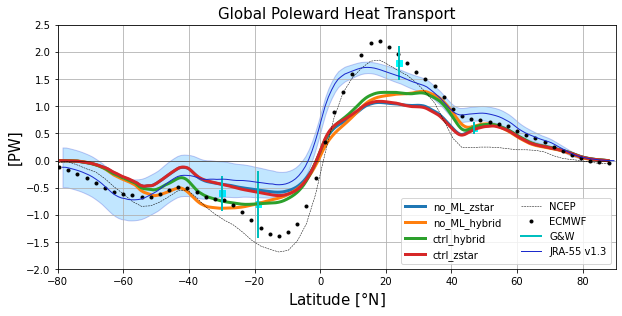

In [3]:
plt.figure(figsize=(10,4.5))

for i in range(len(casename)):
  plot_heat_trans(heat_transport[i], label=label[i])

y = heat_transport[0].yq
plt.xlim(-80,90); plt.ylim(-2.5,3.0); plt.grid(True); 
plt.plot(y, y*0., 'k', linewidth=0.5)
plt.plot(yobs,NCEP['Global'],'k--',linewidth=0.5,label='NCEP'); 
plt.plot(yobs,ECMWF['Global'],'k.',linewidth=0.5,label='ECMWF')
plotGandW(GandW['Global']['lat'],GandW['Global']['trans'],GandW['Global']['err'])
jra = xr.open_dataset('/glade/work/gmarques/cesm/datasets/Heat_transport/jra55fcst_v1_3_annual_1x1/nht_jra55do_v1_3.nc')
jra_mean_global = jra.nht[:,0,:].mean('time').values
jra_std_global = jra.nht[:,0,:].std('time').values
plt.plot(jra.lat, jra_mean_global,'k', label='JRA-55 v1.3', color='#1B2ACC', lw=1)
plt.fill_between(jra.lat, jra_mean_global-jra_std_global, jra_mean_global+jra_std_global,
    alpha=0.25, edgecolor='#1B2ACC', facecolor='#089FFF')

plt.title('Global Poleward Heat Transport',fontsize=15)
plt.xlabel(r'Latitude [$\degree$N]',fontsize=15)
plt.ylabel('[PW]',fontsize=15)
plt.legend(loc=4,fontsize=10, ncol=2)
plt.ylim(-2.,2.5);

### Atlantic Poleward Heat Transport

In [4]:
basin_code = genBasinMasks(grd.geolon, grd.geolat, depth)
m = 0*basin_code; m[(basin_code==2) | (basin_code==4) | (basin_code==6) | (basin_code==7) | (basin_code==8)] = 1

11.16428 64.78855 [391, 434]


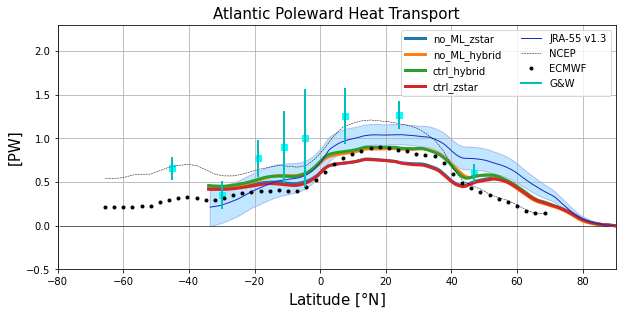

In [5]:
plt.figure(figsize=(10,4.5))

for i in range(len(casename)):
  HTplot = heatTrans(heat_transport[i].T_ady_2d, 
           heat_transport[i].T_diffy_2d,
           heat_transport[i].T_lbd_diffy_2d,
           vmask=m*np.roll(m,-1,axis=-2))

  yy = grd.geolat_c[:,:].max(axis=-1)
  HTplot[yy<-34] = np.nan
  plt.plot(yy,HTplot, linewidth=3,label=label[i])
  
jra_mean_atl = jra.nht[:,1,:].mean('time').values
jra_std_atl = jra.nht[:,1,:].std('time').values
plt.plot(jra.lat, jra_mean_atl,'k', label='JRA-55 v1.3', color='#1B2ACC', lw=1)
plt.fill_between(jra.lat, jra_mean_atl-jra_std_atl, jra_mean_atl+jra_std_atl,
alpha=0.25, edgecolor='#1B2ACC', facecolor='#089FFF')
plt.plot(yobs,NCEP['Atlantic'],'k--',linewidth=0.5,label='NCEP')
plt.plot(yobs,ECMWF['Atlantic'],'k.',linewidth=0.5,label='ECMWF')
plotGandW(GandW['Atlantic']['lat'],GandW['Atlantic']['trans'],GandW['Atlantic']['err'])
plt.xlabel(r'Latitude [$\degree$N]',fontsize=15)
plt.title('Atlantic Poleward Heat Transport',fontsize=15)
plt.legend(ncol=2,fontsize=10)
plt.ylabel('[PW]',fontsize=15)
plt.xlim(-80,90); plt.ylim(-0.5,2.3); plt.grid(True)
plt.plot(y, y*0., 'k', linewidth=0.5);

### Indo-Pacific Poleward Heat Transport

In [6]:
m = 0*basin_code; m[(basin_code==3) | (basin_code==5)] = 1

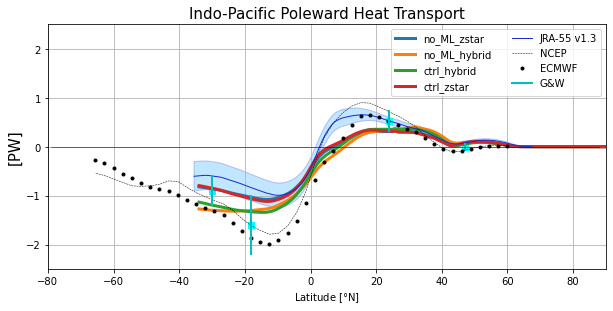

In [7]:
plt.figure(figsize=(10,4.5))

for i in range(len(casename)):
  HTplot = heatTrans(heat_transport[i].T_ady_2d, 
           heat_transport[i].T_diffy_2d,
           heat_transport[i].T_lbd_diffy_2d,
           vmask=m*np.roll(m,-1,axis=-2))

  yy = grd.geolat_c[:,:].max(axis=-1)
  HTplot[yy<-34] = np.nan
  plt.plot(yy,HTplot, linewidth=3,label=label[i])

jra_mean_indo = jra.nht[:,2,:].mean('time').values
jra_std_indo = jra.nht[:,2,:].std('time').values
plt.plot(jra.lat, jra_mean_indo,'k', label='JRA-55 v1.3', 
                 color='#1B2ACC', lw=1)
plt.fill_between(jra.lat, jra_mean_indo-jra_std_indo, 
                 jra_mean_indo+jra_std_indo,
                 alpha=0.25, edgecolor='#1B2ACC', 
                 facecolor='#089FFF')

plt.plot(yobs,NCEP['IndoPac'],'k--',linewidth=0.5,label='NCEP')
plt.plot(yobs,ECMWF['IndoPac'],'k.',linewidth=0.5,label='ECMWF')
plotGandW(GandW['IndoPac']['lat'],GandW['IndoPac']['trans'],GandW['IndoPac']['err'])
plt.xlabel(r'Latitude [$\degree$N]',fontsize=10)
plt.legend(ncol=2,fontsize=10)
plt.title('Indo-Pacific Poleward Heat Transport',fontsize=15)
plt.ylabel('[PW]',fontsize=15)
plt.xlim(-80,90); plt.ylim(-2.5,2.5); plt.grid(True)
plt.plot(y, y*0., 'k', linewidth=0.5);